## Librerías

In [24]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd

import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
from shapely.geometry import Point

## Lectura de datos

In [2]:
oli = "./data/oli.geojson"
papereres = "./data/papereres.geojson"
piles = "./data/piles.geojson"
residus = "./data/residus.geojson"
roba = "./data/roba.geojson"
vidre = "./data/vidre.geojson"


In [3]:
gdf_oli = gpd.read_file(oli)
gdf_papereres = gpd.read_file(papereres)
gdf_residus = gpd.read_file(residus)
gdf_roba = gpd.read_file(roba)
gdf_vidre = gpd.read_file(vidre)
gdf_piles = gpd.read_file(piles)

In [4]:
gdf_oli['tipo'] = "ACEITE"
gdf_oli.rename(columns={'direccion': 'ubicacion'}, inplace=True)

gdf_oli

,tipo,centro,ubicacion,n_distrito,n_barrio,aceite,objectid,estado,codigo,created_user,created_date,last_edited_user,last_edited_date,geo_point_2d,geometry
0,ACEITE,None,"C/ CASTELLÓ, 2",02,021,1,1,Instalado,219,None,NaT,U60391,2022-02-03 07:18:14+00:00,"{'lon': -0.3767966713241999, 'lat': 39.4662892...",POINT (-0.37680 39.46629)
1,ACEITE,ASSOCIACIÓ VEÏNS FONT D'EN CORTS,"CTRA FONT D'EN CORTS, 105",10,106,1,2,Instalado,AV05,None,NaT,U60391,2022-03-01 13:58:26+00:00,"{'lon': -0.35822176539429385, 'lat': 39.445679...",POINT (-0.35822 39.44568)
2,ACEITE,ALCALDIA EL PERELLONET,"AV GAVINES, S/N",19,196,1,11,Instalado,AB05,None,NaT,U60391,2023-05-12 07:16:27+00:00,"{'lon': -0.288838341436949, 'lat': 39.29791367...",POINT (-0.28884 39.29791)
3,ACEITE,MERCAT ALGIRÓS,PL SANT FELIP NERI,12,122,1,31,Instalado,ME07,None,NaT,U60391,2023-05-12 11:06:54+00:00,"{'lon': -0.35347936718283945, 'lat': 39.470008...",POINT (-0.35348 39.47001)
4,ACEITE,"CM ACTIVITATS PERSONES MAJORS ""VIVEROS""","PL ÀVILA, 17",5,053,1,33,Instalado,MA22,None,NaT,U60391,2023-05-12 11:07:44+00:00,"{'lon': -0.3698327174232672, 'lat': 39.4813469...",POINT (-0.36983 39.48135)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,ACEITE,None,"C/ MIQUEL NAVARRO (ESCULTOR), 3",04,044,1,382,Instalado,0,None,NaT,U60391,2023-07-07 10:11:11+00:00,"{'lon': -0.4007810003444046, 'lat': 39.4803515...",POINT (-0.40078 39.48035)
387,ACEITE,None,"C/ VALL DE LA BALLESTERA, 56",04,044,1,384,Instalado,196,None,NaT,U60391,2023-07-07 10:19:00+00:00,"{'lon': -0.4037755033435182, 'lat': 39.4786450...",POINT (-0.40378 39.47865)
388,ACEITE,None,C/ VICENTE TORMO ALFONSO (CARDIOLEG) - C/ MEST...,04,044,1,385,Instalado,180,None,NaT,U60391,2023-07-07 10:21:12+00:00,"{'lon': -0.40369332148354514, 'lat': 39.486226...",POINT (-0.40369 39.48623)
389,ACEITE,None,AV CONSTITUCIÓ-C/ ARQUITECTE LUCINI,05,054,1,389,Instalado,55,None,NaT,U60391,2023-11-08 08:51:22+00:00,"{'lon': -0.37561818100326044, 'lat': 39.489906...",POINT (-0.37562 39.48991)


In [5]:
gdf_papereres['tipo'] = "PAPELERAS"
gdf_papereres.rename(columns={'nomcalle': 'ubicacion'}, inplace=True)

gdf_papereres

,fijacion,modelo,ubicacion,portal,barrio,leyenda_mo,codigo,observ,distritos,objectid,geo_point_2d,geometry,tipo
0,FAROLA,50_LTS_N4,"C. PADRE MUEDRA, 15",15,044,50_LTS_N4 - FAROLA,9619,"FLA. 45, EN JARDIN",04,6001,"{'lon': -0.39921217006762283, 'lat': 39.485743...",POINT (-0.39921 39.48574),PAPELERAS
1,POSTE PO,50_LTS_CIBELES_EXPEND,"C. ARCHIDUQUE CARLOS, 35",35,081,50_LTS_CIBELES_EXPEND - POSTE PO,17343,None,08,6002,"{'lon': -0.39417716818646537, 'lat': 39.465495...",POINT (-0.39418 39.46550),PAPELERAS
2,SEMAFORO,50_LTS_N4,"PSO. ALAMEDA, 21",21,062,50_LTS_N4 - SEMAFORO,8483,ESQ. CON ALAMEDA,06,6006,"{'lon': -0.3629549367745011, 'lat': 39.4725805...",POINT (-0.36295 39.47258),PAPELERAS
3,SEÇ?AL,50_LTS_N4,"C. NAVARRO CABANES, 26",26,071,50_LTS_N4 - SEÇ?AL,7546,ESQ. CON C/ VELAZQUEZ,07,6007,"{'lon': -0.4017668331507958, 'lat': 39.4715842...",POINT (-0.40177 39.47158),PAPELERAS
4,SEMAFORO,50_LTS_N4,"C. JERONIMO MUÇ?OZ, 19",19,091,50_LTS_N4 - SEMAFORO,6226,None,09,6008,"{'lon': -0.38631105680071665, 'lat': 39.459097...",POINT (-0.38631 39.45910),PAPELERAS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16580,SUELO,METÇ­LICA,"G.V. FERNANDO EL CATOLICO, 58",58,033,METÇ­LICA - SUELO,16341,None,03,15988,"{'lon': -0.3871756348999123, 'lat': 39.4735735...",POINT (-0.38718 39.47357),PAPELERAS
16581,SEÇ?AL,50_LTS_N4,"C. MURTA, 26",26,141,50_LTS_N4 - SEÇ?AL,2057,ESQ. C/ MARCELINO GINER,14,15989,"{'lon': -0.35593288314155297, 'lat': 39.485870...",POINT (-0.35593 39.48587),PAPELERAS
16582,POSTE PO,50_LTS_N4,"C. ENCARNA ALBARRACIN (INDUMENTARISTA), 9",9,161,50_LTS_N4 - POSTE PO,14320,"FTE. N¶§ 12, EN PARQUE FLA. 47",16,15991,"{'lon': -0.3907891061491685, 'lat': 39.4980379...",POINT (-0.39079 39.49804),PAPELERAS
16583,SEMAFORO,50_LTS_N4,"AV. CAMPANAR, 74",74,041,50_LTS_N4 - SEMAFORO,9838,FTE. N¶§ 74,04,15996,"{'lon': -0.39256709631704906, 'lat': 39.481906...",POINT (-0.39257 39.48191),PAPELERAS


In [6]:
gdf_roba['tipo'] = "ROPA"
gdf_roba

,empresa,objectid,zona,ubicacion,distrito,barrio,geo_point_2d,geometry,tipo
0,ASOCIACION LA CASA GRANDE,2343,1,"AV PERIS I VALERO, 183",2,021,"{'lon': -0.3638637485441358, 'lat': 39.4620682...",POINT (-0.36386 39.46207),ROPA
1,ASOCIACION LA CASA GRANDE,2344,1,C/ ROÍS DE CORELLA - C/ MESTRE SOSA,3,034,"{'lon': -0.3831486388857912, 'lat': 39.4600690...",POINT (-0.38315 39.46007),ROPA
2,ASOCIACION EL RASTRELL,2351,2,C/ MOLINELL - AV. PRIMAT REIG,5,053,"{'lon': -0.36442608253669373, 'lat': 39.484687...",POINT (-0.36443 39.48469),ROPA
3,ASOCIACION EL RASTRELL,2354,1,C/ AIORA - C/ XIVA,8,081,"{'lon': -0.3922526011590632, 'lat': 39.4663340...",POINT (-0.39225 39.46633),ROPA
4,ASOCIACION EL RASTRELL,2355,1,"C/ ALCÀSSER, 1",7,072,"{'lon': -0.406420300718255, 'lat': 39.47055091...",POINT (-0.40642 39.47055),ROPA
...,...,...,...,...,...,...,...,...,...
295,ASOCIACION LA CASA GRANDE,2628,2,AV FRANÇA - C/ TRAFALGAR,12,125,"{'lon': -0.3463298326099112, 'lat': 39.4588053...",POINT (-0.34633 39.45881),ROPA
296,ASOCIACION LA CASA GRANDE,2634,1,C/ CAMPANERS - C/ PROFESOR BLANCO,8,084,"{'lon': -0.3999281190584628, 'lat': 39.4574569...",POINT (-0.39993 39.45746),ROPA
297,ASOCIACION LA CASA GRANDE,2637,1,C/ ALMÀSSERA - C/ JERÓNIMA GALÉS (IMPRESORA),9,092,"{'lon': -0.39097460999732714, 'lat': 39.452567...",POINT (-0.39097 39.45257),ROPA
298,ASOCIACION LA CASA GRANDE,2639,1,"C/ MESTRE GOZALBO, 10",2,023,"{'lon': -0.3697369210984889, 'lat': 39.4657775...",POINT (-0.36974 39.46578),ROPA


In [7]:
gdf_vidre['tipo'] = "VIDRIO"
# gdf_vidre.rename(columns={'calleempre': 'ubicacion'}, inplace=True)
gdf_vidre

,objectid,sector,zona,anyo,tipovia,calleempre,numportal,unidades,modelo,capacidad,...,tipo,empresa,id,distrito,barrio,actualiza,x,y,geo_point_2d,geometry
0,21187,None,2,JUNIO 2023,CARRER,CARRER TORRETA DE MIRAMAR,6,1,"Iglú 3,0 m3",3000,...,VIDRIO,FCC AMBITO,15251.0,14-BENIMACLET,141-BENIMACLET,JUNIO 2023,726821.785749,4.374226e+06,"{'lon': -0.3625366005764843, 'lat': 39.4877517...",POINT (-0.36254 39.48775)
1,21190,None,1,JUNIO 2023,CARRER,CARRER FONTANARS DELS ALFORINS,70,1,"Iglú 3,0 m3",3000,...,VIDRIO,FCC AMBITO,18513.0,08-PATRAIX,081-PATRAIX,JUNIO 2023,723975.982580,4.371308e+06,"{'lon': -0.3965749997652056, 'lat': 39.4622309...",POINT (-0.39657 39.46223)
2,21193,None,1,JUNIO 2023,CARRER,CARRER SANT VICENT MÀRTIR,45,1,"Iglú 3,0 m3",3000,...,VIDRIO,FCC AMBITO,29482.0,01-CIUTAT VELLA,016-SANT FRANCESC,JUNIO 2023,725579.845507,4.372337e+06,"{'lon': -0.37760252462306615, 'lat': 39.471076...",POINT (-0.37760 39.47108)
3,21194,None,2,JUNIO 2023,AVINGUDA,AVINGUDA CARDENAL BENLLOCH,82,1,"Iglú 3,0 m3",3000,...,VIDRIO,FCC AMBITO,26560.0,13-ALGIRÓS,133-L´AMISTAT,JUNIO 2023,727642.766939,4.372603e+06,"{'lon': -0.3535540004643687, 'lat': 39.4729239...",POINT (-0.35355 39.47292)
4,21197,None,1,JUNIO 2023,CARRER,CARRER HEROI ROMEU,20,1,Iglú 3.0 m3 con boca industria,3000,...,VIDRIO,FCC AMBITO,27085.0,03-EXTRAMURS,034-ARRANCAPINS,JUNIO 2023,724459.227453,4.371993e+06,"{'lon': -0.39073299945179196, 'lat': 39.468269...",POINT (-0.39073 39.46827)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760,23650,None,1,JUNIO 2023,CARRER,CARRER RAMBLA DE EL SALER,3,1,"Iglú 3,0 m3",3000,...,VIDRIO,FCC AMBITO,22158.0,19-POBLES DEL SUD,194-EL SALER,JUNIO 2023,729695.470830,4.362747e+06,"{'lon': -0.3331010003612928, 'lat': 39.3836609...",POINT (-0.33310 39.38366)
2761,23658,None,2,JUNIO 2023,CARRER,CARRER ALFAUIR,53,1,"Iglú 3,0 m3",3000,...,VIDRIO,FCC AMBITO,23246.0,15-RASCANYA,153-SANT LLORENÇ,JUNIO 2023,727112.398404,4.374903e+06,"{'lon': -0.3589300000519718, 'lat': 39.4937699...",POINT (-0.35893 39.49377)
2762,23661,None,2,JUNIO 2023,CARRER,CARRER ORIOLA,43,1,"Iglú 3,0 m3",3000,...,VIDRIO,FCC AMBITO,20582.0,05-LA SAÏDIA,052-MORVEDRE,JUNIO 2023,725457.169782,4.373859e+06,"{'lon': -0.3785129997894261, 'lat': 39.4847999...",POINT (-0.37851 39.48480)
2763,23664,None,2,JUNIO 2023,CARRER,CARRER MONT CARMEL,16,1,"Iglú 3,0 m3",3000,...,VIDRIO,FCC AMBITO,24058.0,15-RASCANYA,152-TORREFIEL,JUNIO 2023,725770.185113,4.375149e+06,"{'lon': -0.37444000015474466, 'lat': 39.496329...",POINT (-0.37444 39.49633)


In [8]:
gdf_residus.rename(columns={'calleempre': 'ubicacion'}, inplace=True)
gdf_residus

,objectid,empresa,ubicacion,numportal,modelo,tipo_carga,productor,tipo,distrito,barrio,actualiza,geo_point_2d,geometry
0,18507,FCC,AV. CONSTITUCIÓ,82,ROS_ROCA_M-R,Lateral Izquierda,Domiciliaria,ORGANICO,05-LA SAÏDIA,055-SANT ANTONI,JUNIO 2023,"{'lon': -0.37695025258946224, 'lat': 39.487765...",POINT (-0.37695 39.48777)
1,18510,FCC,C/. RUAYA,12,ROS_ROCA,Lateral Derecha,Domiciliaria,ENVASES LIGEROS,05-LA SAÏDIA,052-MORVEDRE,JUNIO 2023,"{'lon': -0.374791272168296, 'lat': 39.48546581...",POINT (-0.37479 39.48547)
2,18512,FCC,C/. SAGUNT,24,ROS_ROCA,Lateral Derecha,Domiciliaria,ENVASES LIGEROS,05-LA SAÏDIA,052-MORVEDRE,JUNIO 2023,"{'lon': -0.37490931050080095, 'lat': 39.483450...",POINT (-0.37491 39.48345)
3,18514,FCC,C/. RUAYA,26,ROS_ROCA,Lateral Derecha,Domiciliaria,ENVASES LIGEROS,05-LA SAÏDIA,052-MORVEDRE,JUNIO 2023,"{'lon': -0.3762810847446185, 'lat': 39.4855476...",POINT (-0.37628 39.48555)
4,18516,FCC,C/. ACTOR MORA,21,ROS_ROCA,Lateral Derecha,Domiciliaria,ENVASES LIGEROS,05-LA SAÏDIA,052-MORVEDRE,JUNIO 2023,"{'lon': -0.37698338174217993, 'lat': 39.486244...",POINT (-0.37698 39.48624)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19652,15981,FCC,AV. FRANÇA,71,None,Trasera,Barredora,RESTO,12-CAMINS AL GRAU,123-LA CREU DEL GRAU,JUNIO 2023,"{'lon': -0.34231335655798517, 'lat': 39.458405...",POINT (-0.34231 39.45841)
19653,15982,FCC,AV. FRANÇA,71,None,Trasera,Barredora,RESTO,12-CAMINS AL GRAU,123-LA CREU DEL GRAU,JUNIO 2023,"{'lon': -0.342283515549842, 'lat': 39.45840525...",POINT (-0.34228 39.45841)
19654,15985,FCC,AV. FRANÇA,71,None,Trasera,Barredora,RESTO,12-CAMINS AL GRAU,123-LA CREU DEL GRAU,JUNIO 2023,"{'lon': -0.34218212173314294, 'lat': 39.458373...",POINT (-0.34218 39.45837)
19655,15990,FCC,C/. GENERAL LLORENS,1,ROS_ROCA,Lateral Derecha,Domiciliaria,RESTO,16-BENICALAP,161-BENICALAP,JUNIO 2023,"{'lon': -0.38537884287392116, 'lat': 39.489941...",POINT (-0.38538 39.48994)


In [9]:
gdf_piles['tipo'] = "PILAS"
gdf_piles.rename(columns={'direccion': 'ubicacion'}, inplace=True)
gdf_piles

,tipo,centro,ubicacion,n_distrito,n_barrio,pilas,objectid,zona,observacio,codigo,geo_point_2d,geometry
0,PILAS,MERCAT DEL GRAU,PL. MERCAT NOU,11,111,1,1,3.0,None,ME11,"{'lon': -0.3348547446756048, 'lat': 39.4612658...",POINT (-0.33485 39.46127)
1,PILAS,"CM ACTIVITATS PERSONES MAJORS ""GIORGETA-CARMEN...","AV. GIORGETA, 18",9,091,1,2,1.0,None,MA11,"{'lon': -0.3858615594705692, 'lat': 39.4603782...",POINT (-0.38586 39.46038)
2,PILAS,AJUNTAMENT DE VALÈNCIA-TABAQUERA (Entrada Regi...,"C/. AMADEU DE SAVOIA, 11",6,061,1,4,2.0,None,DM06,"{'lon': -0.36213070107963596, 'lat': 39.474042...",POINT (-0.36213 39.47404)
3,PILAS,SERVICI EDUCACIÓ FÍSICA – UNIVERSIT VALÉNCIA,"C/. ALBALAT DELS TARONGERS, S/N",13,135,1,5,2.0,None,ED31,"{'lon': -0.34012438914318743, 'lat': 39.476575...",POINT (-0.34012 39.47658)
4,PILAS,"CM ACTIVITATS PERSONES MAJORS ""MALILLA""","C/. JUAN RAMON JIMÉNEZ, 18",10,103,1,6,3.0,None,MA35,"{'lon': -0.3764464359533808, 'lat': 39.4549738...",POINT (-0.37645 39.45497)
...,...,...,...,...,...,...,...,...,...,...,...,...
152,PILAS,UP SANT ISIDRE,"C/. JOSÉ ANDREU ALABARTA, 25",8,082,1,146,1.0,None,UP04,"{'lon': -0.40420449524049834, 'lat': 39.453336...",POINT (-0.40420 39.45334)
153,PILAS,CEIP MIGUEL ADLERT I NOGUEROL,"C/. PEPE ALBA, 21",12,121,1,148,2.0,None,ED26,"{'lon': -0.3467815964105589, 'lat': 39.4677828...",POINT (-0.34678 39.46778)
154,PILAS,AVAPACE,PL JOSÉ MARÍA ORENSE,13,132,1,149,2.0,None,ED28,"{'lon': -0.3402540238630378, 'lat': 39.4733531...",POINT (-0.34025 39.47335)
155,PILAS,"CM ACTIVITATS PERSONES MAJORS ""FONT DE SANT LL...","C/. SEVERIANO GOIG, S/N",10,105,1,152,3.0,None,MA36,"{'lon': -0.3634029826765563, 'lat': 39.4547338...",POINT (-0.36340 39.45473)


## Uniformando gdfs

In [10]:
columnas_a_conservar = ['tipo','geo_point_2d', 'geometry']

In [11]:
gdf_oli = gdf_oli[columnas_a_conservar].reset_index(drop=True)
gdf_papereres = gdf_papereres[columnas_a_conservar].reset_index(drop=True)
gdf_residus = gdf_residus[columnas_a_conservar].reset_index(drop=True)
gdf_roba = gdf_roba[columnas_a_conservar].reset_index(drop=True)
gdf_vidre = gdf_vidre[columnas_a_conservar].reset_index(drop=True)
gdf_piles = gdf_piles[columnas_a_conservar].reset_index(drop=True)

In [12]:
gdf_oli = gdf_oli.reset_index(drop=True)
gdf_papereres = gdf_papereres.reset_index(drop=True)
gdf_residus = gdf_residus.reset_index(drop=True)
gdf_roba = gdf_roba.reset_index(drop=True)
gdf_vidre = gdf_vidre.reset_index(drop=True)
gdf_piles = gdf_piles.reset_index(drop=True)

gdf = pd.concat([gdf_oli, gdf_papereres, gdf_residus, gdf_roba, gdf_piles, gdf_vidre])

In [13]:
gdf = gdf.reset_index(drop=True)

In [15]:
gdf.to_file('reciclaje.geojson', driver='GeoJSON')

# CARGAR DIRECTAMENTE DATOS

In [18]:
gdf = gpd.read_file('reciclaje.geojson')

In [ ]:
"""# Usar las funciones create_map(), add_marker_fa(), add_ruta_ant() y crea_ruta(), ya definidas, 
# para crear un mapa con rutas y marcadores
import folium
import folium.plugins
import openrouteservice
 
def create_map(center, zoom=14):
    m = folium.Map(location=list(reversed(center)), zoom_start=zoom)
    return m
 
def add_marker_fa(m, coords, text="", color="red", icon="info-sign"):
    folium.map.Marker(list(reversed(coords)),
                      icon=folium.Icon(color=color,
                                       icon=icon,
                                       prefix='fa'
                                       ),
                      popup=text,
                      ).add_to(m)
    return m
 
def add_ruta_ant(m, ruta, color="red"):
    rev_ruta = []
    for x in ruta:
        rev_ruta.append(list(reversed(x)))
    folium.plugins.AntPath(rev_ruta, color=color).add_to(m)
    return m   
 
def crea_ruta(mapa, client, coordenadas, color='red', tipo='foot-walking'):
    # tipo es un valor entre 
    ### [“driving-car”, “driving-hgv”, “foot-walking”, “foot-hiking”, “cycling-regular”, 
    ### “cycling-road”,”cycling-mountain”, “cycling-electric”]
 
    route = client.directions(coordinates=coordenadas,
                                  profile=tipo,
                                  format='geojson')
    ruta = route['features'][0]['geometry']['coordinates']
    mapa = add_ruta_ant(mapa, ruta, color=color)
    suma = 0
    segments = route['features'][0]['properties']['segments']
    for i in segments:
        #print(i['distance'])
        suma = suma + i['distance']
 
    return {'distancia': suma, 'mapa': mapa, 'ruta': ruta}
 
# Creación de la función que mapea la ruta que se le pasa como parámetro
def mapear_ruta(mapa, ruta, color1, icon_color):
    lista = []
    for monumento in ruta.instancias_monumentos: # Para cada monumento de la ruta, obtener sus coordenadas
        coords = []
        coords.append(float(monumento.longitude[0]))
        coords.append(float(monumento.latitude[0]))
        lista.append(coords)
        iconos = add_marker_fa(mapa, coords, text=monumento.name, color=icon_color) # Pintar el marcador del monumento
    client = openrouteservice.Client(key='5b3ce3597851110001cf624808201db2d50549b2aa2cf44910e719be')
    crea_ruta(mapa, client, lista, color = color1) # Crear el camino de hormigas de la ruta
    return mapa
 
# Llamar a la función para obtener el resultado del ejercicio
mapa1 = create_map([-0.3750, 39.4699], zoom=13.4)
mapear_ruta(mapa1, ontologia_modificada.Ruta_bioparc, 'blue', 'darkred')"""

## Gestión de rutas

### Para manejar menos datos

In [21]:
contenedores_gdf = gdf.copy()

In [22]:
contenedores_gdf = contenedores_gdf.loc[:10]
contenedores_gdf

,tipo,geo_point_2d,geometry
0,ACEITE,"{'lon': -0.3767966713241999, 'lat': 39.4662892...",POINT (-0.37680 39.46629)
1,ACEITE,"{'lon': -0.35822176539429385, 'lat': 39.445679...",POINT (-0.35822 39.44568)
2,ACEITE,"{'lon': -0.288838341436949, 'lat': 39.29791367...",POINT (-0.28884 39.29791)
3,ACEITE,"{'lon': -0.35347936718283945, 'lat': 39.470008...",POINT (-0.35348 39.47001)
4,ACEITE,"{'lon': -0.3698327174232672, 'lat': 39.4813469...",POINT (-0.36983 39.48135)
5,ACEITE,"{'lon': -0.389861242032982, 'lat': 39.51868046...",POINT (-0.38986 39.51868)
6,ACEITE,"{'lon': -0.40841802232151014, 'lat': 39.472694...",POINT (-0.40842 39.47269)
7,ACEITE,"{'lon': -0.3807018948645797, 'lat': 39.4773619...",POINT (-0.38070 39.47736)
8,ACEITE,"{'lon': -0.4098725624867536, 'lat': 39.4720230...",POINT (-0.40987 39.47202)
9,ACEITE,"{'lon': -0.3559671813311137, 'lat': 39.4868704...",POINT (-0.35597 39.48687)


In [ ]:
# pip install geopandas osmnx networkx shapely matplotlib

### Descargar un grafo de Valencia

In [ ]:
# Definir la ubicación de la ciudad (por ejemplo, Valencia, España)
ciudad = "Valencia, Spain"

# Descargar el grafo de la red de calles de la ciudad
# Puedes especificar network_type como 'walk' para peatones, 'drive' para vehículos, etc.
graph = ox.graph_from_place(ciudad, network_type='walk')

# Simplificar el grafo para eliminar nodos y aristas redundantes
# graph = ox.simplify_graph(graph)


In [ ]:
# Dibujar el grafo
fig, ax = ox.plot_graph(graph, node_size=10, node_color='blue', edge_color='black', edge_linewidth=0.5, bgcolor='white')


In [ ]:
# Guardar el grafo a un archivo
ox.save_graphml(graph, filepath="valencia_street_graph.graphml")

# CARGAR DIRECTAMENTE GRAFO

In [25]:

# Cargar el grafo desde el archivo
graph = ox.load_graphml(filepath="valencia_street_graph.graphml")


### Programa

Comenzando el cálculo de la ruta más corta...
entrandooo
Ruta calculada hacia contenedor en índice 0 con distancia 0.00 metros.
entrandooo
Ruta calculada hacia contenedor en índice 1 con distancia 2946.33 metros.
2946.3279999999995
entrandooo
Ruta calculada hacia contenedor en índice 2 con distancia 21570.68 metros.
21570.684999999983
entrandooo
Ruta calculada hacia contenedor en índice 3 con distancia 2294.73 metros.
2294.7319999999995
entrandooo
Ruta calculada hacia contenedor en índice 4 con distancia 2220.12 metros.
2220.118
entrandooo
Ruta calculada hacia contenedor en índice 5 con distancia 6817.69 metros.
6817.694000000001
entrandooo
Ruta calculada hacia contenedor en índice 6 con distancia 3520.35 metros.
3520.3510000000006
entrandooo
Ruta calculada hacia contenedor en índice 7 con distancia 1632.30 metros.
1632.2969999999998
entrandooo
Ruta calculada hacia contenedor en índice 8 con distancia 3640.43 metros.
3640.428999999999
entrandooo
Ruta calculada hacia contenedor en índic

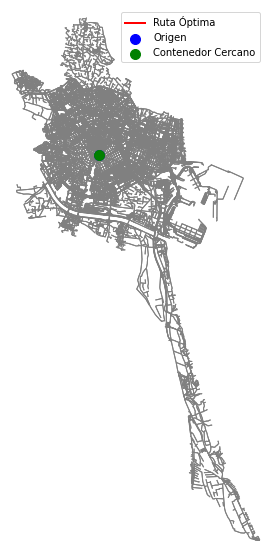

Distancia mínima a un contenedor: 0.00 metros.
Ubicación del contenedor más cercano: POINT (-0.3767966713242 39.46628925527343)


In [26]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Definir la coordenada de origen (por ejemplo, centro de Valencia)
coordenada_origen = (39.4662, -0.3767)  # Latitud, Longitud
# Crear un GeoDataFrame con la coordenada de origen
origen_gdf = gpd.GeoDataFrame([{'geometry': Point(coordenada_origen)}], crs="EPSG:4326")


# Cargar el grafo desde el archivo
graph = ox.load_graphml(filepath="valencia_street_graph.graphml")

# Encontrar el nodo más cercano en la red de calles al punto de origen
origen_node = ox.distance.nearest_nodes(graph, X=coordenada_origen[1], Y=coordenada_origen[0])

# Inicializar variables para encontrar la ruta óptima
distancia_minima = float("inf")
ruta_optima = None
contenedor_cercano = None

print("Comenzando el cálculo de la ruta más corta...")

# Iterar sobre cada contenedor para encontrar la ruta más corta
for idx, contenedor in contenedores_gdf.iterrows():
    print("entrandooo")
    try:
        destino_geom = contenedor['geometry']

        # Convertir a WGS84 si es necesario
        if contenedores_gdf.crs != "EPSG:4326":
            destino_geom = destino_geom.to_crs("EPSG:4326")

        destino_x, destino_y = destino_geom.x, destino_geom.y

        # Encontrar el nodo más cercano en la red de calles al punto de destino
        destino_node = ox.distance.nearest_nodes(graph, X=destino_x, Y=destino_y)

        # Calcular la ruta más corta usando NetworkX
        ruta = nx.shortest_path(graph, origen_node, destino_node, weight='length')
        distancia_ruta = nx.shortest_path_length(graph, origen_node, destino_node, weight='length')

        print(f"Ruta calculada hacia contenedor en índice {idx} con distancia {distancia_ruta:.2f} metros.")

        # Actualizar la distancia mínima y la ruta óptima
        if distancia_ruta < distancia_minima:
            distancia_minima = distancia_ruta
            ruta_optima = ruta
            contenedor_cercano = destino_geom
        else:
            print(distancia_ruta)

    except nx.NetworkXNoPath:
        print(f"No se encontró una ruta entre el origen y el contenedor en índice {idx}.")
    except Exception as e:
        print(f"Ocurrió un error al calcular la ruta para el contenedor en índice {idx}: {e}")
    except:
        print("NO FUNCIONA")

# Visualizar la ruta óptima si se encontró
if ruta_optima:
    print("Ruta óptima encontrada, generando visualización...")

    fig, ax = plt.subplots(figsize=(10, 10))

    # Plotea el grafo de la red de calles
    ox.plot_graph(graph, ax=ax, show=False, close=False, edge_color='gray', node_size=0)

    # Plotea la ruta óptima
    ruta_coords = [(graph.nodes[node]['x'], graph.nodes[node]['y']) for node in ruta_optima]
    ruta_lons, ruta_lats = zip(*ruta_coords)
    ax.plot(ruta_lons, ruta_lats, color='red', linewidth=2, label='Ruta Óptima')

    # Plotea el punto de origen
    origen_lons, origen_lats = zip(*[(coordenada_origen[1], coordenada_origen[0])])
    ax.scatter(origen_lons, origen_lats, color='blue', s=100, label='Origen')

    # Plotea el contenedor cercano
    if contenedor_cercano is not None:
        destino_lons, destino_lats = zip(*[(contenedor_cercano.x, contenedor_cercano.y)])
        ax.scatter(destino_lons, destino_lats, color='green', s=100, label='Contenedor Cercano')

    plt.legend()
    plt.show()

    print(f"Distancia mínima a un contenedor: {distancia_minima:.2f} metros.")
    print(f"Ubicación del contenedor más cercano: {contenedor_cercano}")

else:
    print("No se encontró una ruta óptima.")


In [ ]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
import folium
from shapely.geometry import Point

# Definir la coordenada de origen (por ejemplo, centro de Valencia)
coordenada_origen = (39.469, -0.376)  # Latitud, Longitud

# Crear un GeoDataFrame con la coordenada de origen
origen_gdf = gpd.GeoDataFrame([{'geometry': Point(coordenada_origen)}], crs="EPSG:4326")


# Cargar el grafo desde el archivo
graph = ox.load_graphml(filepath="valencia_street_graph.graphml")

# Encontrar el nodo más cercano en la red de calles al punto de origen
origen_node = ox.distance.nearest_nodes(graph, X=coordenada_origen[1], Y=coordenada_origen[0])

# Inicializar variables para encontrar la ruta óptima
distancia_minima = float("inf")
ruta_optima = None
contenedor_cercano = None

print("Comenzando el cálculo de la ruta más corta...")

# Iterar sobre cada contenedor para encontrar la ruta más corta
for idx, contenedor in contenedores_gdf.iterrows():
    try:
        destino_geom = contenedor['geometry']

        # Convertir a WGS84 si es necesario
        if contenedores_gdf.crs != "EPSG:4326":
            destino_geom = destino_geom.to_crs("EPSG:4326")

        destino_x, destino_y = destino_geom.x, destino_geom.y

        # Encontrar el nodo más cercano en la red de calles al punto de destino
        destino_node = ox.distance.nearest_nodes(graph, X=destino_x, Y=destino_y)

        # Calcular la ruta más corta usando NetworkX
        ruta = nx.shortest_path(graph, origen_node, destino_node, weight='length')
        distancia_ruta = nx.shortest_path_length(graph, origen_node, destino_node, weight='length')

        print(f"Ruta calculada hacia contenedor en índice {idx} con distancia {distancia_ruta:.2f} metros.")

        # Actualizar la distancia mínima y la ruta óptima
        if distancia_ruta < distancia_minima:
            distancia_minima = distancia_ruta
            ruta_optima = ruta
            contenedor_cercano = destino_geom

    except nx.NetworkXNoPath:
        print(f"No se encontró una ruta entre el origen y el contenedor en índice {idx}.")
    except Exception as e:
        print(f"Ocurrió un error al calcular la ruta para el contenedor en índice {idx}: {e}")

# Visualizar la ruta óptima si se encontró
if ruta_optima:
    print("Ruta óptima encontrada, generando visualización interactiva...")

    # Crear un mapa centrado en la coordenada de origen
    mapa = folium.Map(location=[coordenada_origen[0], coordenada_origen[1]], zoom_start=14)

    # Añadir el marcador del punto de origen
    folium.Marker(
        location=[coordenada_origen[0], coordenada_origen[1]],
        popup='Origen',
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(mapa)

    # Añadir el marcador del contenedor cercano
    if contenedor_cercano is not None:
        folium.Marker(
            location=[contenedor_cercano.y, contenedor_cercano.x],
            popup='Contenedor Cercano',
            icon=folium.Icon(color='green', icon='info-sign')
        ).add_to(mapa)

    # Añadir la ruta óptima
    ruta_coords = [(graph.nodes[node]['y'], graph.nodes[node]['x']) for node in ruta_optima]
    folium.PolyLine(ruta_coords, color='red', weight=5, opacity=0.7).add_to(mapa)

    # Guardar el mapa interactivo como archivo HTML y mostrarlo
    mapa.save('ruta_optima.html')
    print(f"Mapa interactivo guardado como 'ruta_optima.html'. Abre este archivo en tu navegador para visualizarlo.")
else:
    print("No se encontró una ruta óptima.")

